# 2017 Upper Hours Attendance Analysis

### Import the required Python modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [2]:
df = pd.read_excel('ADA001 - 2017 Upper House Attendance.xlsx', parse_dates=['From Date','To Date'])

### Shape of the Data

In [3]:
df.shape

(249, 9)

Inference : 

### Check out for null values

In [4]:
df.isnull().sum()

s.no.                                    0
Division/ SeatNo                         0
Name Of Member                           0
session                                  0
From Date                                0
To Date                                  0
State                                    0
Total Sittings                           0
No Of Days Member Signed The Register    0
dtype: int64

Inference : There is no missing values

### Check for Duplicate records

In [5]:
df.duplicated().sum()

0

Inference : There is no dupplicate record

### Quick view of the data

In [6]:
df.head(2)

,s.no.,Division/ SeatNo,Name Of Member,session,From Date,To Date,State,Total Sittings,No Of Days Member Signed The Register
0,1,0,Shri Vinay Dinu Tendulkar,243,2017-07-17,2017-11-08,Goa,19,9
1,2,0,Smt. Sampatiya Uikey,243,2017-07-17,2017-11-08,Madhya Pradesh,19,2


In [7]:
df.tail(2)

,s.no.,Division/ SeatNo,Name Of Member,session,From Date,To Date,State,Total Sittings,No Of Days Member Signed The Register
247,248,249,Dr. Pradeep Kumar Balmuchu,243,2017-07-17,2017-11-08,Jharkhand,19,17
248,249,250,Shri Mahendra Singh Mahra,243,2017-07-17,2017-11-08,Uttarakhand,19,19


In [8]:
df.sample(5)

,s.no.,Division/ SeatNo,Name Of Member,session,From Date,To Date,State,Total Sittings,No Of Days Member Signed The Register
166,167,163,Shri Ravi Prakash Verma,243,2017-07-17,2017-11-08,Uttar Pradesh,19,17
152,153,149,Shri Ram Chandra Prasad Singh,243,2017-07-17,2017-11-08,Bihar,19,11
147,148,145,Shri Bashistha Narain Singh,243,2017-07-17,2017-11-08,Bihar,19,14
87,88,87,Shri Mukul Roy,243,2017-07-17,2017-11-08,West Bengal,19,10
41,42,41,Shri Prabhat Jha,243,2017-07-17,2017-11-08,Madhya Pradesh,19,18


### Information about the Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   s.no.                                  249 non-null    int64         
 1   Division/ SeatNo                       249 non-null    int64         
 2   Name Of Member                         249 non-null    object        
 3   session                                249 non-null    int64         
 4   From Date                              249 non-null    datetime64[ns]
 5   To Date                                249 non-null    datetime64[ns]
 6   State                                  249 non-null    object        
 7   Total Sittings                         249 non-null    int64         
 8   No Of Days Member Signed The Register  249 non-null    object        
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 17.6+ KB


Inference : Data type of 'No Of Days Member Signed The Register' should be numeric but it shown as Object

### Statistical measures

In [10]:
df.describe()

,s.no.,Division/ SeatNo,session,Total Sittings
count,249.000000,249.000000,249.0,249.0
mean,125.000000,122.899598,243.0,19.0
std,72.024301,71.077039,0.0,0.0
min,1.000000,0.000000,243.0,19.0
25%,63.000000,62.000000,243.0,19.0
50%,125.000000,125.000000,243.0,19.0
75%,187.000000,183.000000,243.0,19.0
max,249.000000,250.000000,243.0,19.0


Inference : There is no signifiance

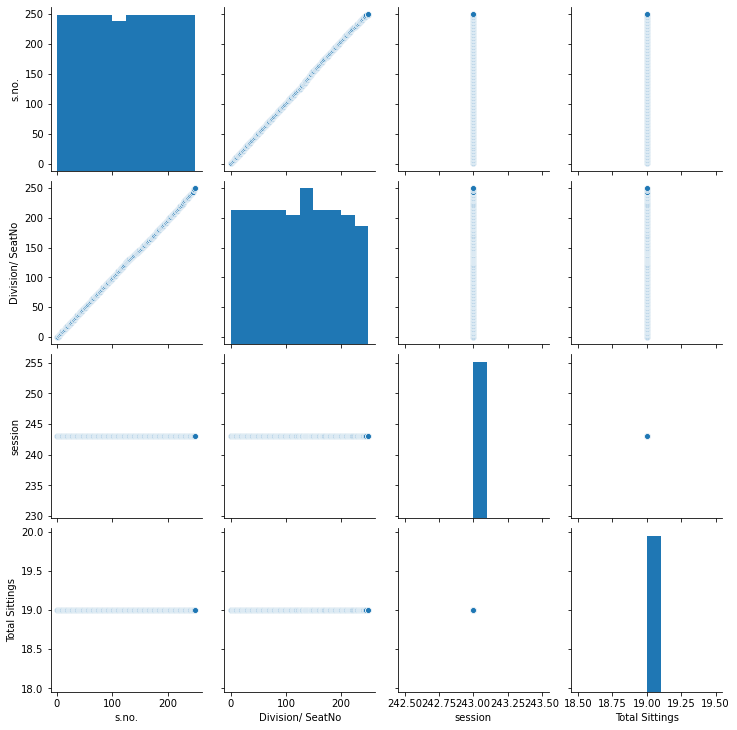

In [11]:
sns.pairplot(df)

Inference : Not significant

### Rename Columns

In [12]:
df.columns

Index(['s.no.', 'Division/ SeatNo', 'Name Of Member', 'session', 'From Date',
       'To Date', 'State', 'Total Sittings',
       'No Of Days Member Signed The Register'],
      dtype='object')

In [13]:
df.rename(columns={'No Of Days Member Signed The Register' : 'Present', 'Name Of Member':'Name'}, inplace=True)

### Data wrangling

### Create a new column ,'Absent'

In [14]:
df.Present.value_counts()

19     61
18     34
17     27
M      19
16     17
14     17
13     12
11      9
15      9
10      8
8       8
1       6
12      6
7       3
6       3
2       3
9       2
4       2
5       1
LOP     1
HDC     1
Name: Present, dtype: int64

In [15]:
# Function to calculate number of days absent
def cal_absent(x):
    if x in ['M','LOP','PM','HDC']: # Not required to record the presence
        return(-1)
    else:
        return(19-int(x))

In [16]:
df['Absent'] = df.Present.apply(cal_absent)

### Create a new column, 'Gender'

In [17]:
def get_gender(name):
    first = name.split(" ")[0]
    if first in ['Shri','Dr.','Prof.']:
        return('M')
    elif first in ['Smt.','Ms.','Km.','Kumari']:
        return('F')
    else:
        return('M')

In [18]:
df['Gender'] = df.Name.apply(get_gender)

### Create a new column , 'Elected'

In [19]:
df['Elected'] = df.State.apply(lambda x: 'N' if x == 'Nominated' else 'Y')

### Create a cleaned Dataframe after removing 'M', 'LOP' and 'HDC'

In [20]:
df_cleaned = df[~df['Present'].isin(['M','LOP','HDC'])].copy()

### Create a new column, 'Personal Rank'

In [21]:
df_cleaned['Personal Rank'] = pd.cut(df_cleaned.Present, bins=3, labels=[3,2,1])

In [22]:
df_cleaned

,s.no.,Division/ SeatNo,Name,session,From Date,To Date,State,Total Sittings,Present,Absent,Gender,Elected,Personal Rank
0,1,0,Shri Vinay Dinu Tendulkar,243,2017-07-17,2017-11-08,Goa,19,9,10,M,Y,2
1,2,0,Smt. Sampatiya Uikey,243,2017-07-17,2017-11-08,Madhya Pradesh,19,2,17,F,Y,3
3,4,3,Shri Manohar Parrikar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,1,18,M,Y,3
9,10,9,Shri Gopal Narayan Singh,243,2017-07-17,2017-11-08,Bihar,19,18,1,M,Y,1
10,11,10,Shri Vinay Katiyar,243,2017-07-17,2017-11-08,Uttar Pradesh,19,19,0,M,Y,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,245,243,Smt. Rajani Patil,243,2017-07-17,2017-11-08,Maharashtra,19,18,1,F,Y,1
245,246,244,Smt. Wansuk Syiem,243,2017-07-17,2017-11-08,Meghalaya,19,12,7,F,Y,2
246,247,246,Shri Ripun Bora,243,2017-07-17,2017-11-08,Assam,19,17,2,M,Y,1
247,248,249,Dr. Pradeep Kumar Balmuchu,243,2017-07-17,2017-11-08,Jharkhand,19,17,2,M,Y,1


# Univariate Analysis

### 'Present' column analysis

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 248
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   s.no.             228 non-null    int64         
 1   Division/ SeatNo  228 non-null    int64         
 2   Name              228 non-null    object        
 3   session           228 non-null    int64         
 4   From Date         228 non-null    datetime64[ns]
 5   To Date           228 non-null    datetime64[ns]
 6   State             228 non-null    object        
 7   Total Sittings    228 non-null    int64         
 8   Present           228 non-null    object        
 9   Absent            228 non-null    int64         
 10  Gender            228 non-null    object        
 11  Elected           228 non-null    object        
 12  Personal Rank     228 non-null    category      
dtypes: category(1), datetime64[ns](2), int64(5), object(5)
memory usage: 23.5+ KB


Inference :

### Change data type to Numeric

In [24]:
df_cleaned.Present = pd.to_numeric(df_cleaned.Present)

In [25]:
df_cleaned.Present.describe()

count    228.000000
mean      15.035088
std        4.595401
min        1.000000
25%       13.000000
50%       17.000000
75%       19.000000
max       19.000000
Name: Present, dtype: float64

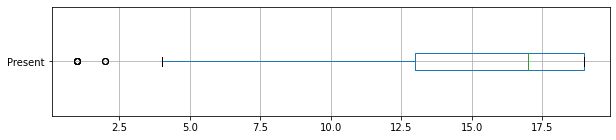

In [26]:
df_cleaned.boxplot(column='Present', vert=False, figsize = (10,2))
plt.show()

Inference : 

In [27]:
q1, q2, q3 = df_cleaned.Present.quantile(q=[.25,.5,.75])
IQR = q3-q1
print("Q1 : {}, Q2 : {}, Q3 : {}, IQR : {}".format(q1,q2,q3,IQR))

Q1 : 13.0, Q2 : 17.0, Q3 : 19.0, IQR : 6.0


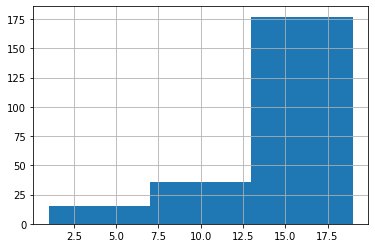

In [28]:
# Histogram
df_cleaned.Present.hist(bins = 3)
plt.show()

Inference : 

### 'State' Column Analysis

In [29]:
df_cleaned.State.value_counts()

Uttar Pradesh                          35
Tamil Nadu                             19
Maharashtra                            17
West Bengal                            15
Bihar                                  14
Nominated                              12
Karnataka                              11
Odisha                                 10
Andhra Pradesh                          9
Rajasthan                               8
Kerala                                  8
Madhya Pradesh                          8
Punjab                                  7
Assam                                   7
Gujarat                                 7
Telangana                               6
Chhattisgarh                            5
Jharkhand                               5
Haryana                                 4
Jammu & Kashmir                         3
National Capital Territory of Delhi     3
Uttarakhand                             3
Himachal Pradesh                        2
Goa                               

Inference : 

### 'Gender' column analysis

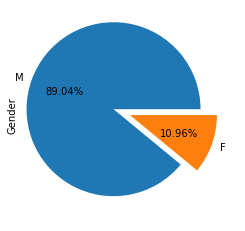

In [30]:
df_cleaned.Gender.value_counts().plot(kind='pie', autopct='%1.2f%%', explode=[0.2,0])

### Multivariate Analysis

Text(0, 0.5, 'Count')

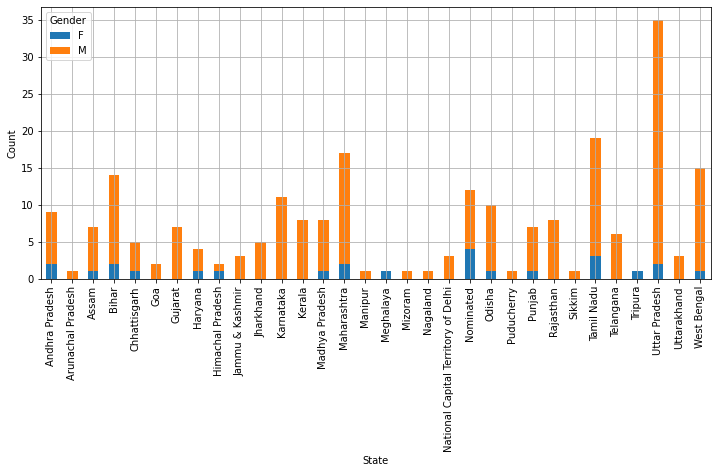

In [31]:
pd.crosstab(df_cleaned.State, df_cleaned.Gender).plot(kind='bar', figsize=(12,5), stacked=True)
plt.grid()
plt.ylabel('Count')

Inference :

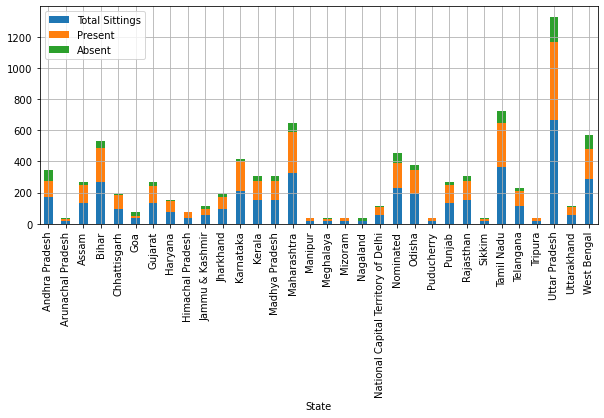

In [32]:
df_cleaned.groupby('State').agg({'Total Sittings': np.sum,'Present': np.sum, 'Absent' : np.sum}).plot(kind='bar', 
                                                                                    stacked=True, figsize=(10,4))
plt.grid()

Inference : 

In [33]:
df_per = df_cleaned.groupby(['State']).agg({'Total Sittings': np.sum,'Present': np.sum, 'Absent' : np.sum})

df_per['Performance'] = df_per['Present'] / df_per['Total Sittings'] * 100

### Top 5 performer

In [34]:
df_per.nlargest(5, 'Performance')

,Total Sittings,Present,Absent,Performance
State,,,,
Himachal Pradesh,38,38,0,100.000000
Mizoram,19,19,0,100.000000
Chhattisgarh,95,92,3,96.842105
Manipur,19,18,1,94.736842
Karnataka,209,193,16,92.344498


### Bottom 5 performer

In [35]:
df_per.nsmallest(5, 'Performance')

,Total Sittings,Present,Absent,Performance
State,,,,
Nagaland,19,1,18,5.263158
Goa,38,13,25,34.210526
Sikkim,19,9,10,47.368421
Andhra Pradesh,171,105,66,61.403509
Meghalaya,19,12,7,63.157895


### Performance Bar chart

Text(0, 0.5, '%')

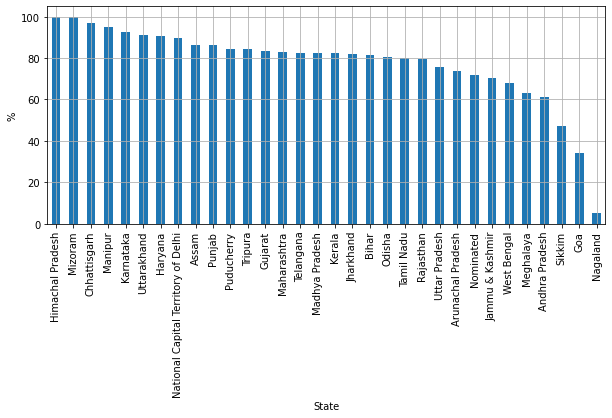

In [36]:
df_per.nlargest(60,'Performance').Performance.plot(kind='bar', figsize=(10,4))
plt.grid()
plt.ylabel('%')

In [37]:
df_per = df_cleaned.groupby(['Gender']).agg({'Total Sittings': np.sum,'Present': np.sum, 'Absent' : np.sum})

df_per['Performance'] = df_per['Present'] / df_per['Total Sittings'] * 100

In [38]:
df_per

,Total Sittings,Present,Absent,Performance
Gender,,,,
F,475,340,135,71.578947
M,3857,3088,769,80.062225


Text(0, 0.5, 'Sum of Sessions')

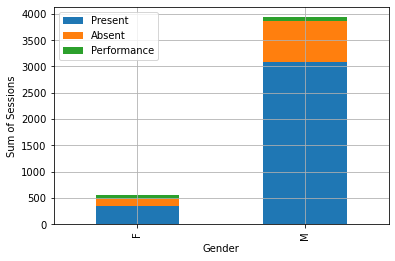

In [39]:
df_per[['Present','Absent','Performance']].plot(kind='bar', stacked=True)
plt.grid()
plt.ylabel('Sum of Sessions')

Text(0, 0.5, 'Count')

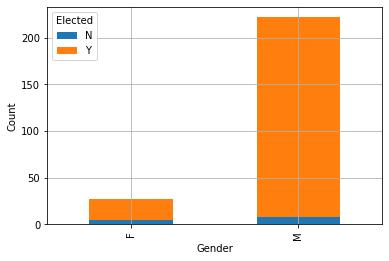

In [40]:
pd.crosstab(df.Gender, df.Elected).plot(kind='bar', stacked=True)
plt.grid()
plt.ylabel('Count')

### Personal Ranking

In [41]:
# Clustering into 3 
pd.crosstab(df_cleaned.Gender, df_cleaned['Personal Rank'], normalize=True, margins=True, margins_name='Total%')

Personal Rank,3,2,1,Total%
Gender,,,,
F,0.017544,0.026316,0.065789,0.109649
M,0.061404,0.171053,0.657895,0.890351
Total%,0.078947,0.197368,0.723684,1.000000


In [42]:
df_cleaned.pivot_table(index='Personal Rank', values='Present', aggfunc={'Present' : [np.min, np.max]})

,amax,amin
Personal Rank,,
3,7,1
2,13,8
1,19,14


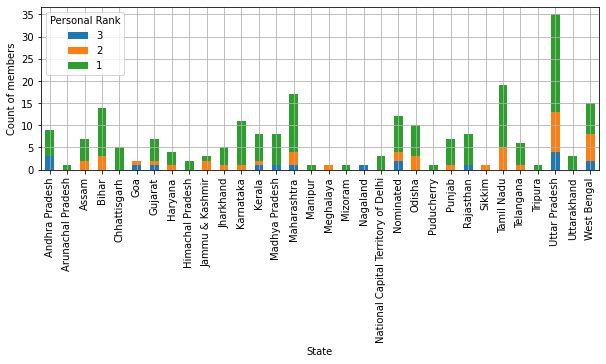

In [43]:
pd.crosstab(df_cleaned.State, df_cleaned['Personal Rank']).plot(kind='bar', stacked=True, figsize=(10,3))
plt.grid()
plt.ylabel('Count of members')
plt.show()